In [2]:
import pandas as pd 

In [3]:
df = pd.read_csv('SPAM text message 20170820 - Data.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Putting in an extra  column which will give each categories a number 

In [4]:
df['ids'] = df['Category'].factorize()[0]

Shuffling the database to remove bias and randomize the data and also removing the blank values. 

In [5]:
import numpy as np
from sklearn.utils import shuffle
df = shuffle(df)
df = df.replace(r' ', np.nan)
df = df.dropna()

In [6]:
from sklearn.model_selection import train_test_split 

In [7]:
train_df = df.iloc[:4457,:]
test_df = df.iloc[4458:5572,:]

In [8]:
import matplotlib.pyplot as plt


In [9]:
test_df

,Category,Message,ids
313,ham,He says he'll give me a call when his friend's...,0
4458,ham,Aight should I just plan to come up later toni...,0
4794,ham,Or u ask they all if next sat can a not. If al...,0
796,ham,it's really getting me down just hanging around.,0
4305,ham,"Good good, billy mates all gone. Just been jog...",0
...,...,...,...
4963,ham,Yup ok...,0
1911,ham,Becoz its &lt;#&gt; jan whn al the post ofic...,0
407,ham,All was well until slightly disastrous class t...,0
5335,ham,No. It's not pride. I'm almost &lt;#&gt; yea...,0


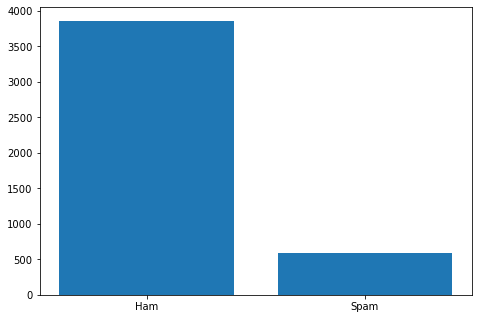

In [14]:
from matplotlib import pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ham, spam = train_df['Category'].value_counts()
Mess_type = ['Ham', 'Spam']
Mess_count = [ham, spam]
ax.bar(Mess_type, Mess_count)
plt.show()



Our training set is imbalanced and hence there are high chances that bias could be induced in our training model. 

Converting the all the text to lower case 

In [15]:
train_df['Message'] = train_df['Message'].str.lower()

/var/folders/h8/4m_c3pfj1cnd2kpvtxkflc600000gn/T/ipykernel_2690/1326804694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Message'] = train_df['Message'].str.lower()


In [16]:
train_df

,Category,Message,ids
4232,ham,u really pig leh sleep so much. my dad wake me...,0
2061,ham,i did. one slice and one breadstick. lol,0
1744,ham,i love to wine and dine my lady!,0
3800,ham,"actually nvm, got hella cash, we still on for ...",0
72,ham,hi babe im at home now wanna do something? xx,0
...,...,...,...
4021,ham,university of southern california.,0
4944,ham,check mail.i have mailed varma and kept copy t...,0
2257,ham,"just checked out, heading out to drop off my s...",0
4699,ham,don no da:)whats you plan?,0


# Removing stopwords 

In [17]:
from nltk.corpus import stopwords
word = set(stopwords.words('english')) 
stop = stopwords.words('english') # Basically, we will save all the stop words collection in a list
train_df['Message'] = train_df['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # we will match words in ur text to the ones from the list
train_df['Message']

/var/folders/h8/4m_c3pfj1cnd2kpvtxkflc600000gn/T/ipykernel_2690/3706990871.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Message'] = train_df['Message'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)])) # we will match words in ur text to the ones from the list


4232    u really pig leh sleep much. dad wake 10 smth ...
2061                   did. one slice one breadstick. lol
1744                                 love wine dine lady!
3800    actually nvm, got hella cash, still &lt;#&gt; ...
72                    hi babe im home wanna something? xx
                              ...                        
4021                      university southern california.
4944    check mail.i mailed varma kept copy regarding ...
2257                      checked out, heading drop stuff
4699                                      da:)whats plan?
3988    ringtone club: gr8 new polys direct mobile eve...
Name: Message, Length: 4457, dtype: object

# Stemming 

In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
train_df['Message'] = train_df['Message'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
train_df['Message'] = train_df['Message'].str.replace('[^\w\s]','')
train_df['Message']

/var/folders/h8/4m_c3pfj1cnd2kpvtxkflc600000gn/T/ipykernel_2690/2964377847.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Message'] = train_df['Message'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
/var/folders/h8/4m_c3pfj1cnd2kpvtxkflc600000gn/T/ipykernel_2690/2964377847.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_df['Message'] = train_df['Message'].str.replace('[^\w\s]','')
/var/folders/h8/4m_c3pfj1cnd2kpvtxkflc600000gn/T/ipykernel_2690/2964377847.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

4232    u realli pig leh sleep much dad wake 10 smth 2...
2061                     did one slice one breadstick lol
1744                                  love wine dine lady
3800             actual nvm got hella cash still ltgt ish
72                     hi babe im home wanna something xx
                              ...                        
4021                          univers southern california
4944    check maili mail varma kept copi regard member...
2257                            check out head drop stuff
4699                                          dawhat plan
3988    rington club gr8 new poli direct mobil everi w...
Name: Message, Length: 4457, dtype: object

# Lemmetization 

In [20]:
from nltk.stem import WordNetLemmatizer
import numpy as np 
wordnet_lemm = WordNetLemmatizer()
lemm_words = np.vectorize(wordnet_lemm.lemmatize)
lemm_text = ' '.join(lemm_words(train_df['Message']))
train_df['Message']

4232    u realli pig leh sleep much dad wake 10 smth 2...
2061                     did one slice one breadstick lol
1744                                  love wine dine lady
3800             actual nvm got hella cash still ltgt ish
72                     hi babe im home wanna something xx
                              ...                        
4021                          univers southern california
4944    check maili mail varma kept copi regard member...
2257                            check out head drop stuff
4699                                          dawhat plan
3988    rington club gr8 new poli direct mobil everi w...
Name: Message, Length: 4457, dtype: object

# Splitting words 

In [24]:
word_count = pd.Series(' '.join(train_df['Message']).split()).value_counts()
word_count.sample(10)
word_count

u                 897
call              514
2                 376
get               368
im                361
                 ... 
jamstercouk         1
logosmusicnews      1
videosounds2        1
videosound          1
careinsha           1
Length: 7954, dtype: int64

# TFIDF 

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english', lowercase = True)
# With this method we will split our text into one and two words combination. 
# Depending upon their usage and importance they will be assigned a value.  
Message = tfidf.fit_transform(train_df['Message']).toarray()
ids = train_df['ids']
print(Message)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Chi Square 

In [27]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
kbest = SelectKBest(score_func = chi2, k = 500 ) # Here using the chi-square test, we will determine which top 500 features will be retained. 
best_ham = kbest.fit_transform(Message, ids)
best_ham

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(best_ham,ids, test_size = 0.3, random_state = 60,shuffle=True)

In [33]:
#Now we will first test MultinomialNB model without cross validation.
from sklearn.naive_bayes import MultinomialNB   
from sklearn.metrics import confusion_matrix
multi = MultinomialNB()
multi.fit(X_train, Y_train) # fit method allows us to fit our data into the model 
Y_pred = multi.predict(X_test) # using predict() we will predict the dependent values for the corresponding independent variables.
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1155
           1       1.00      0.42      0.59       183

    accuracy                           0.92      1338
   macro avg       0.96      0.71      0.77      1338
weighted avg       0.93      0.92      0.91      1338



Now we will use the same model but with k fold cross validation 

In [43]:
from sklearn.model_selection import cross_val_score
multi.fit(X_train, Y_train)
scores = cross_val_score(multi, X_train, Y_train, cv=10)
scores 
scores.mean(), scores.std()

(0.9051034710198698, 0.010608008470652248)